In [1]:
# prompt: truy cập google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import csv
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from statistics import mean
import joblib



import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/dataset/Cycling_data/Raw_data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/dataset/Cycling_data/Raw_data/Active 2024_11_27_10_4_25.txt


In [3]:
from pathlib import Path
work_dir = Path('/content/drive/MyDrive/dataset/Cycling_data')

In [4]:
# LOAD DATA
raw_data = pd.read_csv(r'/content/drive/MyDrive/dataset/Cycling_data/cyclingLabel.csv')

# **1.Preview data**



In [5]:
# DISCOVER THE DATA TO GAIN INSIGHTS

# Quick view of the data
print('\n____________ Dataset info ____________')
print(raw_data.info())
print('\n____________ Some first data examples ____________')
print(raw_data.head(3))
print('\n____________ Statistics of numeric features ____________')
print(raw_data.describe())


____________ Dataset info ____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             1136 non-null   object 
 1   t                1136 non-null   float64
 2   Tau_Motor        1136 non-null   float64
 3   Tau_1            1136 non-null   float64
 4   Tau_2            1136 non-null   float64
 5   vel              1136 non-null   float64
 6   encoder_count    1136 non-null   int64  
 7   mode             1136 non-null   object 
 8   level            1136 non-null   int64  
 9   turn             1136 non-null   int64  
 10  period           1136 non-null   int64  
 11  push_leg         1136 non-null   object 
 12  degree           1136 non-null   float64
 13  phase            1136 non-null   int64  
 14  Tau_Motor_deriv  1136 non-null   float64
 15  Tau_1_deriv      1136 non-null   float64
 16  Tau_2_deriv      113

# **2.PREPARE THE DATA**

# 2.1. Remove unused features

In [6]:
# prompt: từ raw data, lấy new data từ raw data với period từ 46 - 50

# Assuming 'period' is a column in your raw_data DataFrame
view_data = raw_data[(raw_data['period'] >=46) & (raw_data['period'] <= 90)]
# view_data = raw_data.copy()
# Quick view of the data
print('\n____________ Dataset info ____________')
print(view_data.info())
print('\n____________ Some first data examples ____________')
print(view_data.head(3))
print('\n____________ Statistics of numeric features ____________')
print(view_data.describe())


____________ Dataset info ____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             1136 non-null   object 
 1   t                1136 non-null   float64
 2   Tau_Motor        1136 non-null   float64
 3   Tau_1            1136 non-null   float64
 4   Tau_2            1136 non-null   float64
 5   vel              1136 non-null   float64
 6   encoder_count    1136 non-null   int64  
 7   mode             1136 non-null   object 
 8   level            1136 non-null   int64  
 9   turn             1136 non-null   int64  
 10  period           1136 non-null   int64  
 11  push_leg         1136 non-null   object 
 12  degree           1136 non-null   float64
 13  phase            1136 non-null   int64  
 14  Tau_Motor_deriv  1136 non-null   float64
 15  Tau_1_deriv      1136 non-null   float64
 16  Tau_2_deriv      113

In [7]:
raw_data.drop(columns = ["date", "t", "encoder_count", "level", "period", "degree", "turn", "push_leg", "mode"], inplace=True)
view_data.drop(columns = ["date", "t", "encoder_count", "level", "period", "degree", "turn", "push_leg", "mode"], inplace=True)

In [8]:
print('\n____________ Dataset info ____________')
print(view_data.info())


____________ Dataset info ____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tau_Motor        1136 non-null   float64
 1   Tau_1            1136 non-null   float64
 2   Tau_2            1136 non-null   float64
 3   vel              1136 non-null   float64
 4   phase            1136 non-null   int64  
 5   Tau_Motor_deriv  1136 non-null   float64
 6   Tau_1_deriv      1136 non-null   float64
 7   Tau_2_deriv      1136 non-null   float64
 8   vel_deriv        1136 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 80.0 KB
None


In [9]:
raw_data.isnull().sum()

,0
Tau_Motor,0
Tau_1,0
Tau_2,0
vel,0
phase,0
Tau_Motor_deriv,0
Tau_1_deriv,0
Tau_2_deriv,0
vel_deriv,0


In [10]:
raw_data.duplicated().sum()

0

In [11]:

from sklearn.preprocessing import MinMaxScaler

# Assuming 'raw_data' is your DataFrame and it's already loaded
# from the previous code.

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select columns to scale (exclude 'phase')
columns_to_scale = [col for col in view_data.columns if col != 'phase']

# Fit and transform the selected columns
scaled_data = scaler.fit_transform(view_data[columns_to_scale])

# Create a new DataFrame with scaled data
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Concatenate the scaled data with the 'phase' column
scaled_df['phase'] = view_data['phase']

# Now 'scaled_df' contains the scaled data, and you can use it
# for your modeling.
print(scaled_df.head(6))

   Tau_Motor     Tau_1     Tau_2       vel  Tau_Motor_deriv  Tau_1_deriv  \
0   0.464789  0.576389  0.485393  0.011261         0.535304     0.555154   
1   0.464789  0.562500  0.519101  0.159910         0.522824     0.573098   
2   0.498994  0.513889  0.561798  0.328078         0.510345     0.573515   
3   0.494970  0.513889  0.561798  0.328078         0.502529     0.570594   
4   0.494970  0.458333  0.694382  0.276276         0.487816     0.516066   
5   0.494970  0.409722  0.761798  0.164414         0.468506     0.532619   

   Tau_2_deriv  vel_deriv  phase  
0     0.643707   0.818227      1  
1     0.552249   0.870305      1  
2     0.540908   0.672008      1  
3     0.614955   0.378568      1  
4     0.672008   0.229344      1  
5     0.600146   0.174261      1  


# 2.2. Split training-test set


In [12]:
from sklearn.preprocessing import OneHotEncoder
def split_sequence_xy(df, label, window_size):
  x = []
  y = []
  enc = OneHotEncoder(handle_unknown='ignore')
  enc.fit(scaled_df[[label]])
  y = enc.transform(scaled_df[[label]]).toarray()[window_size:]
  for i in range(window_size, len(df)):
    sequence = df.iloc[i-window_size:i].drop(columns=label).values
    x.append(sequence)

  return np.array(x), y

def split_xy(df, label):
  x = []
  y = []
  y = df[label].values[:]
  x = df.drop(columns=label).values

  return np.array(x), y

def split_xy_raw(df, label):
  x = []
  y = []
  enc = OneHotEncoder(handle_unknown='ignore')
  enc.fit(scaled_df[[label]])
  y = df[label].values[:]
  x = df.drop(columns=label).values

  return np.array(x), y

In [13]:

# X,y = split_sequence_xy(scaled_df, 'phase', 5)
X,y = split_xy(view_data, 'phase')
print(len(X),len(y))
print(X[0:5])
print(y[0:5])

1136 1136
[[ 3.45000000e+00  2.87200000e+01  1.44500000e+01  7.88000000e+00
   9.92857143e-02 -4.82142857e-02  4.02023810e-01  3.70000000e+00]
 [ 3.45000000e+00  2.87000000e+01  1.46000000e+01  1.18400000e+01
   7.21428571e-02 -3.28571429e-02  8.80952381e-02  4.22000000e+00]
 [ 3.62000000e+00  2.86300000e+01  1.47900000e+01  1.63200000e+01
   4.50000000e-02 -3.25000000e-02  4.91666667e-02  2.24000000e+00]
 [ 3.60000000e+00  2.86300000e+01  1.47900000e+01  1.63200000e+01
   2.80000000e-02 -3.50000000e-02  3.03333333e-01 -6.90000000e-01]
 [ 3.60000000e+00  2.85500000e+01  1.53800000e+01  1.49400000e+01
  -4.00000000e-03 -8.16666667e-02  4.99166667e-01 -2.18000000e+00]]
[1 1 1 1 1]


In [14]:
# prompt: từ tập x,y, chia train, validation, test set theo tỉ lệ  80%:10%:10%

from sklearn.model_selection import train_test_split
a = 0.07
b = 1
X_for_test = X[int(a*len(X)):int(b*len(X))]
y_for_test = y[int(a*len(y)):int(b*len(y))]
# X_for_test = X
# y_for_test = y
print(X_for_test.shape, y_for_test.shape)

(1057, 8) (1057,)


# **3.TRAIN AND EVALUATE MODELS**

In [15]:
# import tensorflow as tf  # Make sure TensorFlow is installed and imported

# # ... previous code ...

# model_filename = work_dir / 'models/rnn_model2024-12-26_15-43-42.h5'
# #Check if model file exist
# if os.path.exists(model_filename):
#     print("Loading model...")
#     model = tf.keras.models.load_model(model_filename)  # Use Keras to load
#     print(f"Model loaded from {model_filename}")
# else:
#     print(f"Model file not found at {model_filename}")
#     #If not found, you can train a new model or handle it accordingly
#     # Example:
#     # loaded_model = train_your_model(...)
#     # model.save(model_filename) # Use Keras to save
#     # print("New model trained and saved.")

# # Now you can use the 'loaded_model' for predictions
# # Example
# # predictions = model.predict(X_for_test)

In [16]:
# import tensorflow as tf

# # Convert the model to a TensorFlow Lite model
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]

# # Enable resource variables and disable lowering tensor list ops
# converter.experimental_enable_resource_variables = True
# converter.target_spec.supported_ops = [
#   tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS
# ]
# converter._experimental_lower_tensor_list_ops = False

# tflite_model = converter.convert()
tflite_model_filename = work_dir / 'models/rnn_model2024-12-26_15-43-42.tflite'
# # Save the model
# with open(tflite_model_filename, "wb") as f:
#     f.write(tflite_model)

In [17]:
import numpy as np
import tensorflow as tf

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=str(tflite_model_filename))
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


In [18]:
# prompt: lấy min, max của từng cột data, lưu thành list min, max các cột

min_max_list = []
for col in raw_data.columns:
    if col != 'phase':  # Exclude the 'phase' column
      if raw_data[col].dtype in ['int64', 'float64']:  # Check if column is numeric
          min_val = raw_data[col].min()
          max_val = raw_data[col].max()
          min_max_list.append((min_val, max_val))
      else:
          min_max_list.append(('Not applicable', 'Not applicable')) # or handle non-numeric columns as needed

min_max_list

[(1.14, 6.11),
 (27.89, 29.33),
 (12.29, 16.74),
 (7.58, 34.22),
 (-1.0649999999999995, 1.1100000000000012),
 (-0.5233333333333345, 0.3325000000000002),
 (-1.8075000000000017, 1.625000000000004),
 (-4.4700000000000015, 5.514999999999999)]

In [19]:
min_max_list[0][1]

6.11

In [20]:
def Scaler_Data(X,min_max_list):
  sca = np.ones_like(X)
  for i in range(len(X)):
    # print(X[i])
    for j in range(len(X[i])):
      sca[i][j] = (X[i][j] - min_max_list[j][0]) / (min_max_list[j][1] - min_max_list[j][0])
  return sca

In [21]:
import time
# count_time = 0
# t0 = time.time()
# l_time = []
# y_pred = []
# window_size = 9
# for i in range(window_size,len(X_for_test)):
#   input = X_for_test[i-window_size:i]
#   input = Scaler_Data(input,min_max_list)
#   # print('Input:',input)
#   # Reshape the input to add the batch size dimension
#   input = input.reshape(1, input.shape[0], input.shape[1])
#   output = np.argmax(model.predict(input),axis=1)
#   y_pred.append(output[0]+1)
#   print(f'Predict {output[0]+1}: {y_for_test[i]}')
#   t1 = time.time()
#   count_time = t1 - t0
#   l_time.append(count_time)
#   t0 = t1
#   print(f'Time: {count_time}')



In [22]:


count_time = 0
t0 = time.time()
l_time = []
y_pred = []
window_size = 5
for i in range(window_size,len(X_for_test)):
  input_shape = input_details[0]['shape']
  # Prepare your input data (e.g., scale data and reshape)
  input_data = X_for_test[i-window_size:i]  # Example data
  input_data = Scaler_Data(input_data, min_max_list)  # Scale the data
  input_data = input_data.reshape(input_shape)       # Reshape as required by the model
  input_data = input_data.astype(input_details[0]['dtype'])  # Match the expected data type
  # Set the input tensor
  interpreter.set_tensor(input_details[0]['index'], input_data)

  # Run the inference
  interpreter.invoke()

  # Get the output tensor
  output_data = interpreter.get_tensor(output_details[0]['index'])

  # Convert output if needed (e.g., argmax)
  output = np.argmax(output_data) + 1
  y_pred.append(output)
  print(f'Predict {output}: {y_for_test[i]}')
  t1 = time.time()
  count_time = t1 - t0
  l_time.append(count_time)
  t0 = t1
  print(f'Time: {count_time}')


Predict 1: 1
Time: 0.0038640499114990234
Predict 1: 1
Time: 0.0006244182586669922
Predict 1: 1
Time: 0.0005447864532470703
Predict 1: 1
Time: 0.0005097389221191406
Predict 2: 1
Time: 0.0005550384521484375
Predict 2: 2
Time: 0.0004932880401611328
Predict 2: 2
Time: 0.0005030632019042969
Predict 2: 3
Time: 0.00029587745666503906
Predict 3: 3
Time: 0.0004363059997558594
Predict 3: 3
Time: 0.00035119056701660156
Predict 3: 3
Time: 0.00030159950256347656
Predict 3: 3
Time: 0.0005025863647460938
Predict 3: 3
Time: 0.00041961669921875
Predict 3: 3
Time: 0.00036835670471191406
Predict 3: 3
Time: 0.0003123283386230469
Predict 3: 4
Time: 0.0003352165222167969
Predict 4: 4
Time: 0.0003070831298828125
Predict 4: 1
Time: 0.0003066062927246094
Predict 1: 1
Time: 0.0002684593200683594
Predict 1: 1
Time: 0.0004417896270751953
Predict 1: 1
Time: 0.0004794597625732422
Predict 1: 1
Time: 0.0002837181091308594
Predict 1: 1
Time: 0.00034356117248535156
Predict 1: 1
Time: 0.0002772808074951172
Predict 1: 1


In [23]:
# prompt: from l_time, calculate fps

# Calculate FPS
fps = 1 / np.mean(l_time)
print(f"Frames per second (FPS): {fps}")

Frames per second (FPS): 2416.151789522909


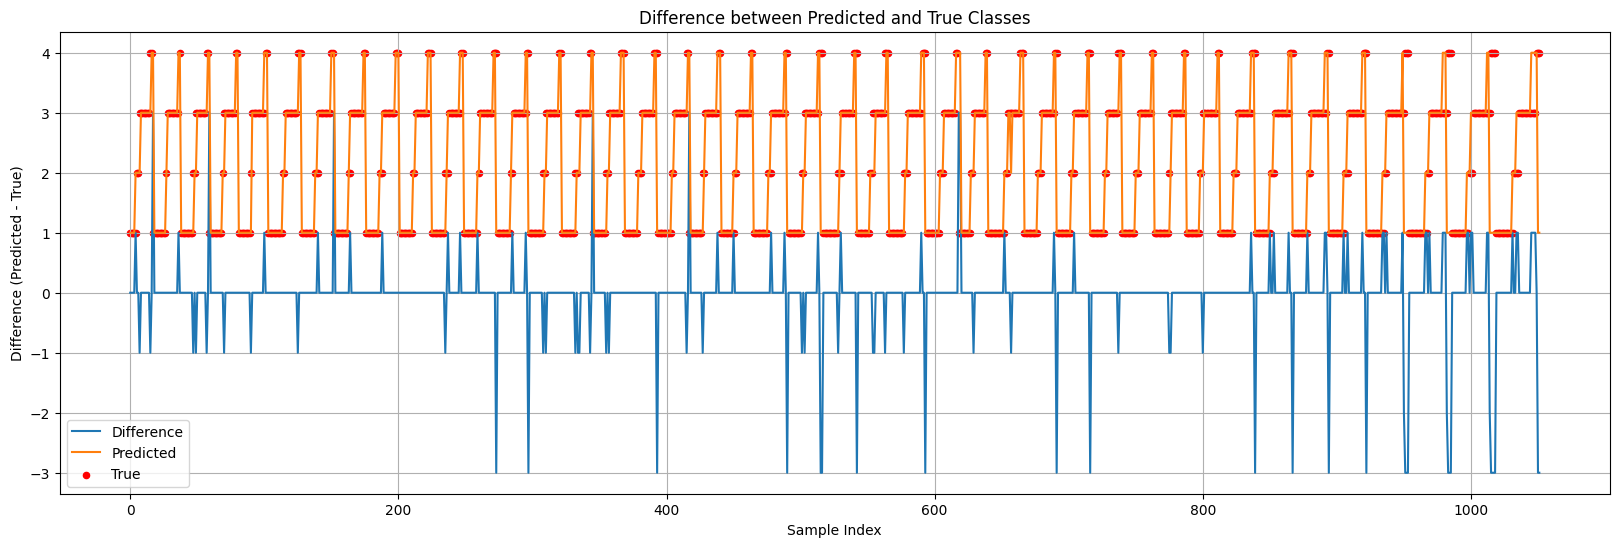

In [24]:
y_pred_classes = y_pred
y_true_classes = y_for_test[window_size:]  # Assuming one-hot encoded labels
# y_pred_classes = np.argmax(y_pred, axis=1)  # Assuming one-hot encoded labels
# y_true_classes = np.argmax(y_for_test, axis=1)  # Assuming one-hot encoded labels
# Calculate the difference
diff = y_pred_classes - y_true_classes
# Create the line plot
plt.figure(figsize=(20, 6))
plt.plot(diff)
plt.plot(y_pred_classes)
plt.scatter(range(len(y_true_classes)), y_true_classes, color='red', label='True Classes', marker='o', s=20) # s is the marker size
plt.xlabel("Sample Index")
plt.ylabel("Difference (Predicted - True)")
plt.title("Difference between Predicted and True Classes")
plt.legend(["Difference", "Predicted", "True"])
plt.grid(True)
plt.show()

Accuracy: 0.8840304182509505
Precision: 0.8154412076240953
Recall: 0.8136480517652374
F1 Score: 0.8143048726366016
True Positives: 0
False Negatives: 0


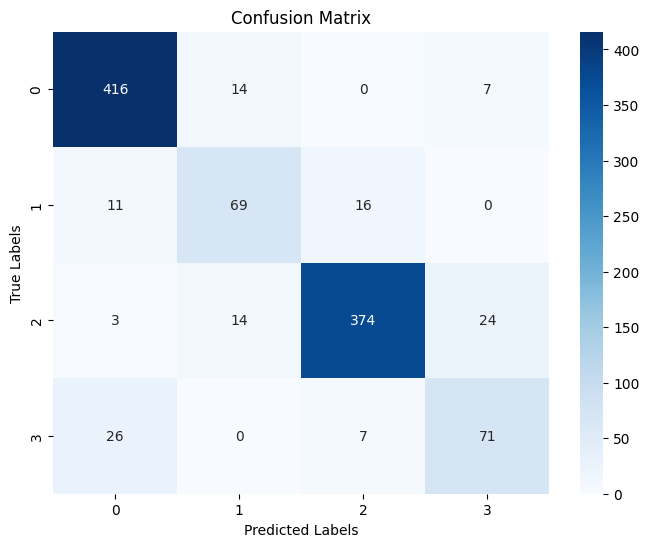

In [25]:
# prompt: y_pred_classes = np.argmax(y_pred, axis=1)  # Assuming one-hot encoded labels
# y_true_classes = np.argmax(y_true, axis=1)  # Assuming one-hot encoded labels
# tính accuracy, True Positives, False Negatives, Precision, F1 Score, Recall, lập confuse matrix

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score, recall_score

# Calculate accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"Accuracy: {accuracy}")

# Calculate True Positives, False Negatives, Precision, F1 Score, Recall
# Note: These metrics require you to specify the positive class label.
# If you have a multi-class problem, you'll need to compute these metrics per class or use averages (e.g., macro-average, micro-average)
# Example with macro average:

precision = precision_score(y_true_classes, y_pred_classes, average='macro')
recall = recall_score(y_true_classes, y_pred_classes, average='macro')
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

true_positives = np.sum(np.logical_and(y_pred_classes == 1, y_true_classes == 1)) # Example for class 1
false_negatives = np.sum(np.logical_and(y_pred_classes == 0, y_true_classes == 1)) # Example for class 1


print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"True Positives: {true_positives}")
print(f"False Negatives: {false_negatives}")


# Create confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Visualize the confusion matrix (same code as before)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import numpy as np
import time

class ATmega2560:
    def __init__(self, clock_speed_mhz=16):
        """ Initialize ATmega2560 simulation with memory, GPIO, and clock """
        self.FLASH_MEMORY = 256 * 1024  # 256 KB Flash
        self.RAM = 8 * 1024  # 8 KB SRAM
        self.clock_speed_mhz = clock_speed_mhz  # Simulated MHz speed
        self.clock_cycles = 0  # Counter for executed clock cycles

        # 54 Digital I/O Pins (Simulated)
        self.GPIO = [0] * 54  # 0 = LOW, 1 = HIGH

        # 15 Analog Input Pins (Simulated as floats 0.0 - 5.0V)
        self.ANALOG_PINS = [0.0] * 16

        # 15 PWM Pins (Simulated as values 0-255)
        self.PWM_PINS = [0] * 15

        # Serial Buffer (Simulating UART Communication)
        self.serial_buffer = []

    ## Clock Pulse Simulation
    def tick(self, cycles=1):
        """ Simulate ATmega's clock pulses (each operation takes cycles) """
        self.clock_cycles += cycles
        print(f"Clock Pulse: {self.clock_cycles} cycles")

    ## GPIO Functions
    def digital_write(self, pin, value):
        """ Set GPIO pin HIGH (1) or LOW (0) and increment clock """
        if 0 <= pin < len(self.GPIO):
            self.GPIO[pin] = 1 if value else 0
            self.tick(1)  # Simulating clock cycle for GPIO operation
        else:
            print(f"Error: Invalid GPIO pin {pin}")

    def digital_read(self, pin):
        """ Read GPIO pin value """
        self.tick(1)  # Simulating read operation delay
        return self.GPIO[pin] if 0 <= pin < len(self.GPIO) else None

    ## PWM Functions
    def analog_write(self, pin, value):
        """ Simulate writing a PWM value (0-255) to a pin """
        if 0 <= pin < len(self.PWM_PINS) and 0 <= value <= 255:
            self.PWM_PINS[pin] = value
            self.tick(2)  # Simulating clock delay for PWM
        else:
            print(f"Error: Invalid PWM pin or value {pin}, {value}")

    ## Analog Read
    def analog_read(self, pin):
        """ Simulate reading an analog value (0.0V - 5.0V) """
        self.tick(3)  # Analog read usually takes longer
        return self.ANALOG_PINS[pin] if 0 <= pin < len(self.ANALOG_PINS) else None

    ## Simulating Serial Communication
    def serial_write(self, data):
        """ Simulate writing data to serial buffer """
        self.serial_buffer.append(data)
        self.tick(5)  # Simulating delay for serial transmission
        print(f"Serial Out: {data}")

    def serial_read(self):
        """ Simulate reading from serial buffer """
        self.tick(5)  # Serial read operation delay
        return self.serial_buffer.pop(0) if self.serial_buffer else None

    ## Main Loop Simulation (like Arduino loop())
    def run(self, loop_function, delay=1):
        """ Simulate Arduino's continuous loop execution with clock """
        print("Starting ATmega2560 Simulation with Clock...\n")
        try:
            while True:
                loop_function(self)
                time.sleep(delay)  # Simulating real-time loop
        except KeyboardInterrupt:
            print("\nSimulation stopped.")

# Example Usage
def my_loop(atmega):
    """ Example loop function that toggles GPIO pin 13 every second """
    current_state = atmega.digital_read(13)
    new_state = 0 if current_state else 1
    atmega.digital_write(13, new_state)
    print(f"GPIO[13] set to {new_state}")

if __name__ == "__main__":
    atmega = ATmega2560()
    atmega.run(my_loop)

# # Simulating ATmega2560 memory limits
# FLASH_MEMORY = 256 * 1024  # 256 KB Flash
# RAM = 8 * 1024  # 8 KB SRAM

# # Simulated GPIO Pins
# GPIO_PINS = [0] * 54  # ATmega2560 has 54 digital I/O pins

# # Lookup Table (Simulating AI Model)
# LOOKUP_TABLE = {
#     0: "Low",
#     1: "Medium",
#     2: "High"
# }

# # Simulating an Integer-Based Neural Network (Fixed Point)
# WEIGHTS = np.array([1, -2, 3])  # Quantized weights
# BIAS = 1

# def simple_nn(input_val):
#     """ Simulated TinyML neural network using integer math """
#     output = np.dot(input_val, WEIGHTS) + BIAS
#     return 1 if output > 0 else 0  # Binary classification

# def read_sensor():
#     """ Simulate reading a sensor value (e.g., temperature, vibration) """
#     return np.random.randint(0, 3)  # Random value (0,1,2)

# def atmega_main_loop():
#     """ Main loop simulating ATmega2560 AI behavior """
#     print("Starting ATmega2560 AI Simulation...\n")
#     while True:
#         # Simulate sensor reading
#         sensor_value = read_sensor()

#         # Simulate AI decision using lookup table
#         classification = LOOKUP_TABLE.get(sensor_value, "Unknown")

#         # Simulate TinyML neural network processing
#         nn_output = simple_nn([sensor_value, 1, -1])  # Example input vector

#         # Simulate GPIO output
#         GPIO_PINS[13] = nn_output  # Simulate writing to LED on pin 13

#         print(f"Sensor: {sensor_value}, AI Output: {classification}, NN Prediction: {nn_output}, GPIO[13]: {GPIO_PINS[13]}")

#         time.sleep(1)  # Simulate real-time processing (like Arduino loop)

# # Run the simulation
# if __name__ == "__main__":
#     atmega_main_loop()


Streaming output truncated to the last 5000 lines.
Clock Pulse: 3868 cycles
GPIO[13] set to 0
Clock Pulse: 3869 cycles
Clock Pulse: 3870 cycles
GPIO[13] set to 1
Clock Pulse: 3871 cycles
Clock Pulse: 3872 cycles
GPIO[13] set to 0
Clock Pulse: 3873 cycles
Clock Pulse: 3874 cycles
GPIO[13] set to 1
Clock Pulse: 3875 cycles
Clock Pulse: 3876 cycles
GPIO[13] set to 0
Clock Pulse: 3877 cycles
Clock Pulse: 3878 cycles
GPIO[13] set to 1
Clock Pulse: 3879 cycles
Clock Pulse: 3880 cycles
GPIO[13] set to 0
Clock Pulse: 3881 cycles
Clock Pulse: 3882 cycles
GPIO[13] set to 1
Clock Pulse: 3883 cycles
Clock Pulse: 3884 cycles
GPIO[13] set to 0
Clock Pulse: 3885 cycles
Clock Pulse: 3886 cycles
GPIO[13] set to 1
Clock Pulse: 3887 cycles
Clock Pulse: 3888 cycles
GPIO[13] set to 0
Clock Pulse: 3889 cycles
Clock Pulse: 3890 cycles
GPIO[13] set to 1
Clock Pulse: 3891 cycles
Clock Pulse: 3892 cycles
GPIO[13] set to 0
Clock Pulse: 3893 cycles
Clock Pulse: 3894 cycles
GPIO[13] set to 1
Clock Pulse: 3895 cycl